<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/05_similarity_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering: Similarity Features

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Show the effect of synthetically added features in non-linear classification with similarity features using Gaussian RBF

Here, we create a hypothetical dataset to show how adding extra features, in this case polynomial, can help with the classification.

In [104]:
# Generate dataset
import numpy as np

x1 = np.linspace(-4, 4, 9) # shape (9,), 1D array
y = (x1 <= 2) & (x1 >= -2) # shape (20,), 1D array
x1 = np.reshape(x1, (-1, 1)) # shape (9,1), 2D array
print([round(xi, 2) for xi in x1[:,0]])
print(y)

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
[False False  True  True  True  True  True False False]


Here, is how the data looks like. A quadratice classifier can be used, but a linear classifier would not be helpful.

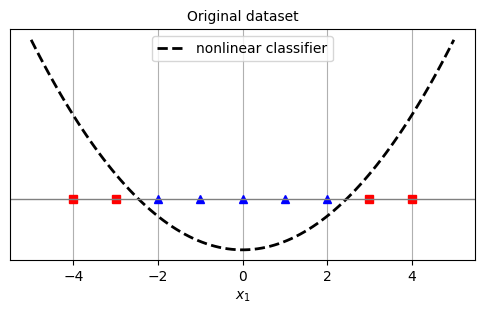

In [105]:
# Plot dataset
import matplotlib.pyplot as plt
x_plot = np.linspace(-5, 5, 100) # just to generate a smooth plot


plt.figure(figsize=(6, 3))

plt.plot(x1[y], np.zeros(len((x1[y]))),"b^")
plt.plot(x1[~y], np.zeros(len((x1[~y]))),"rs")
plt.plot(x_plot, x_plot**2-6, "k--", linewidth=2, label="nonlinear classifier")
plt.axhline(y=0, color='grey', linewidth=1)

plt.legend(loc="upper center")
plt.title("Original dataset", fontsize=10)
plt.xlabel("$x_1$")
plt.gca().yaxis.set_visible(False)
plt.grid()
plt.show()

In [138]:
def gaussian_rbf_transformer(x, landmark, gamma):
    """
    Gaussian Radial Basis Function (RBF) kernel.
    x (n,1):
    landmark (float):
    gamma (float):
    Returns: (n, 1)
    """
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

Below, I used two landmarks (-2 and 1) to transform the original feature to two new features ($x2$ and $x3$). The hyperparameter $\gamma$ is selected as 0.1 and 0.3. Increasing $\gamma$ would make the RBF curve wider.

In [180]:
# Generate Gaussian RBF data points for plot curves
x2_plot = gaussian_rbf_transformer(x_plot.reshape(-1, 1), landmark=-2, gamma=0.3) # for plot porpuses
x3_plot = gaussian_rbf_transformer(x_plot.reshape(-1, 1), landmark=1, gamma=0.3) # for plot purposes

x4_plot = gaussian_rbf_transformer(x_plot.reshape(-1, 1), landmark=-2, gamma=0.1) # for plot porpuses
x5_plot = gaussian_rbf_transformer(x_plot.reshape(-1, 1), landmark=1, gamma=0.1) # for plot purposes



# Transforming inputn feature to Gaussian RBF feature using x1 = -2 and 1 as landmarks
x2 = gaussian_rbf_transformer(x1, landmark=-2, gamma=0.3)
x3 = gaussian_rbf_transformer(x1, landmark=1, gamma=0.3)
x_new_g3 = np.c_[x2, x3]

x4 = gaussian_rbf_transformer(x1, landmark=-2, gamma=0.1)
x5 = gaussian_rbf_transformer(x1, landmark=1, gamma=0.1)
x_new_g1 = np.c_[x4, x5]

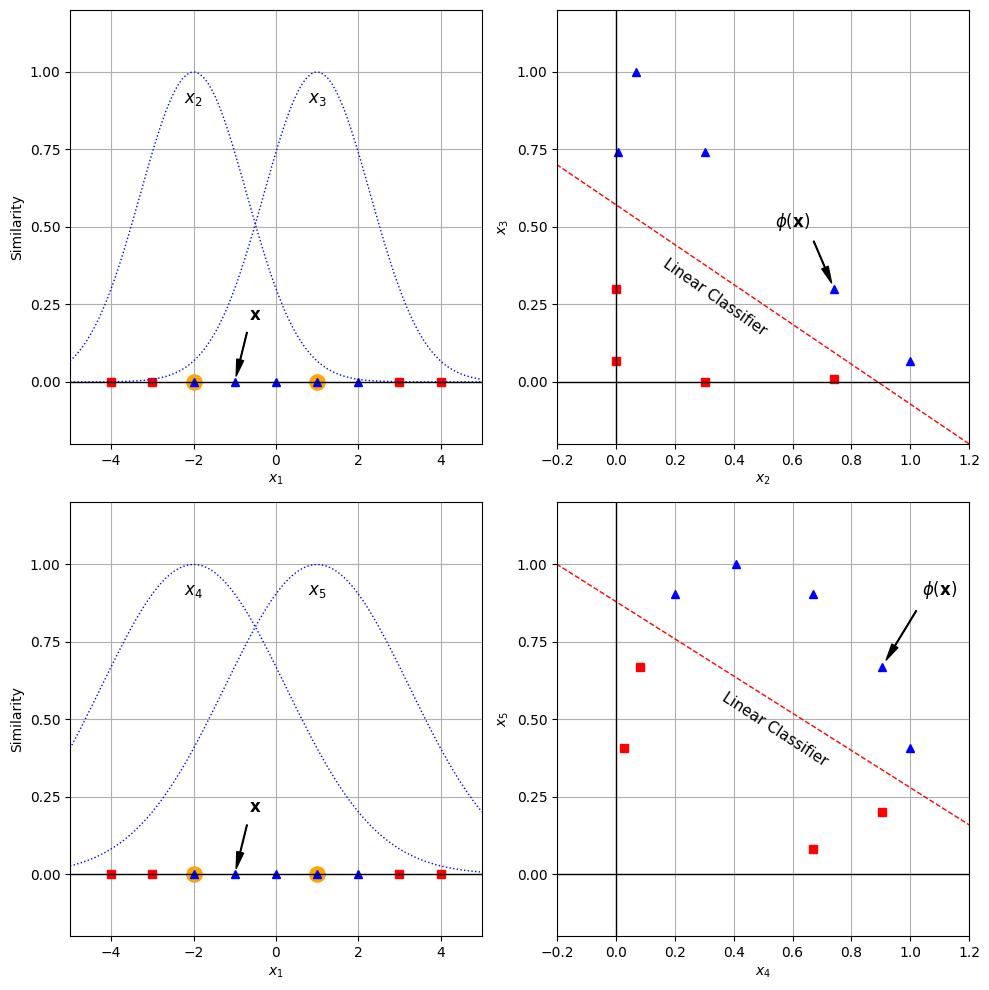

In [194]:
plt.figure(figsize=(10,10))


# Plot original features (only a non-linear classifier can fit)
plt.subplot(221)
plt.plot(x1[y], np.zeros(len((x1[y]))),"b^")
plt.plot(x1[~y], np.zeros(len((x1[~y]))),"rs")
plt.plot(x_plot, x2_plot, "b:", linewidth=1, label="landmark=-2, gamma=0.3")
plt.plot(x_plot, x3_plot, "b:", linewidth=1, label="landmark=1, gamma=0.3")
plt.scatter([-2, 1], [0, 0], s=120, c='orange', alpha=1.) # highlight landmarks @ -2 and 1
plt.hlines(0, -5, 5, color='k', linestyle='-', linewidth=1)
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(x1[3, 0], 0), # x1[3,0] = -1
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1, width=0.5, headwidth=5),
    fontsize=12)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=12)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=12)
plt.xlim(-5, 5)
plt.ylim(-0.2, 1.2)
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.grid(True)


# Plot Gaussian RBF transformed features, dropping original feature (linear classifier fits)
plt.subplot(222)
plt.plot(x_new_g3[:, 0][y], x_new_g3[:, 1][y], "b^")
plt.plot(x_new_g3[:, 0][~y], x_new_g3[:, 1][~y], "rs")
plt.plot([1.2, -0.2], [-0.2, 0.7], "r--", linewidth=1)
plt.axhline(y=0, color='k',linewidth=1)
plt.axvline(x=0, color='k',linewidth=1)
plt.xlabel("$x_2$")
plt.ylabel("$x_3$")
plt.xlim(-0.2, 1.2)
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.ylim(-0.2, 1.2)
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.annotate(
    r'$\phi( \mathbf{x} )$', # \phi(x) is the transformed features using Gaussian RBF transformation
    xy=(x_new_g3[3, 0], x_new_g3[3, 1]),
    xytext=(0.6, 0.5),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1, width=0.5, headwidth=5),
    fontsize=12)
plt.text(0.15, 0.15, "Linear Classifier", ha="left", fontsize=11, rotation=-35)
plt.grid(True)


plt.subplot(223)
plt.plot(x1[y], np.zeros(len((x1[y]))),"b^")
plt.plot(x1[~y], np.zeros(len((x1[~y]))),"rs")
plt.plot(x_plot, x4_plot, "b:", linewidth=1, label="landmark=-2, gamma=0.1")
plt.plot(x_plot, x5_plot, "b:", linewidth=1, label="landmark=1, gamma=0.1")
plt.scatter([-2, 1], [0, 0], s=120, c='orange', alpha=1.) # highlight landmarks @ -2 and 1
plt.hlines(0, -5, 5, color='k', linestyle='-', linewidth=1)
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(x1[3, 0], 0), # x1[3,0] = -1
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1, width=0.5, headwidth=5),
    fontsize=12)
plt.text(-2, 0.9, "$x_4$", ha="center", fontsize=12)
plt.text(1, 0.9, "$x_5$", ha="center", fontsize=12)
plt.xlim(-5, 5)
plt.ylim(-0.2, 1.2)
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.grid(True)


plt.subplot(224)
plt.plot(x_new_g1[:, 0][y], x_new_g1[:, 1][y], "b^")
plt.plot(x_new_g1[:, 0][~y], x_new_g1[:, 1][~y], "rs")
plt.plot([1.8, -0.2], [-0.2, 1.], "r--", linewidth=1)
plt.axhline(y=0, color='k',linewidth=1)
plt.axvline(x=0, color='k',linewidth=1)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.annotate(
    r'$\phi( \mathbf{x} )$', # \phi(x) is the transformed features using Gaussian RBF transformation
    xy=(x_new_g1[3, 0], x_new_g1[3, 1]),
    xytext=(1.1, .9),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1, width=0.5, headwidth=5),
    fontsize=12)
plt.text(0.35, 0.35, "Linear Classifier", ha="left", fontsize=11, rotation=-33)
plt.xlabel("$x_4$")
plt.ylabel("$x_5$")
plt.grid(True)


plt.tight_layout()
plt.show()

Obviously a linear classifier (e.g., LinearSVC) cannot be used in this case. An alternative approuch would be to use Gaussian RBF transformer to generate new features ($x_2$ and $x_3$). As seen in the right plots, a linear classifier can be used in the new feature space. However, the classifier characteristics depends on the selection of the hyperparameter $\gamma$.